In [2]:
import pandas as pd
import en_core_web_sm
import itertools
import collections
import nltk
import numpy as np
import os
from csv import reader, writer
import random
import time
import csv
from shifterator import shifts as rs
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

In [68]:
# Load final dataset for analysis
results = pd.read_csv("AnalysisData10-21.csv")
results

,ID,ComID,Comment,ProComment,NameEnt,Name,Club,SkinColor,Sentiment,Emotion
0,8913,fky522w,Aaron Wan-Bissaka. The only reason he hasn't p...,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Manchester United,Dark Brown,0.0000,neutral
1,5457,ey5bfj0,Hey Dreamerofspring \n\n\nThanks so much for...,especially the chances of Abu and Pepe,Abu,Abu Danladi,Minnesota United,Black,0.2682,positive
2,18166,cedjva3,"No Adnan, Zaha loosing ground. List confirmed ...",List confirmed for Abu bias,Abu,Abu Danladi,Minnesota United,Black,-0.1027,negative
3,10672,fsqbsrt,Obviously there are some unbelievable talents ...,Obviously there are some unbelievable talents ...,Achraf Hakimi,Achraf Hakimi,Paris Saint-Germain,Olive,0.6705,positive
4,10697,fsrwoid,Amazes me that Achraf Hakimi is in this list,Amazes me that Achraf Hakimi is in this list,Achraf Hakimi,Achraf Hakimi,Paris Saint-Germain,Olive,0.4939,positive
...,...,...,...,...,...,...,...,...,...,...
2578,2367,e95pg7r,"I’m curious about this, as at that time we wer...",Brazilians liked Zico of course (watch him in ...,Zico,Zico Bailey,FC Cincinnati,Dark Brown,-0.8656,negative
2579,5016,eobas50,SMH It's not like this has happened overnight ...,He does not even have the best players in the ...,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.4588,positive
2580,2464,e9fzjp8,They gave Zinchenko a chance only because they...,They gave Zinchenko a chance only because they...,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.5413,positive
2581,5595,eyzdfg3,I could see Pep go 3 at the back to counter. O...,Heck I could see Pep try to adapt Mendy or Zin...,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.3400,positive


In [71]:
len(results.unique())

384

In [ ]:
uni_player = pd.DataFrame(columns=['ID', 'ComID', 'Comment', 'ProComment', 'NameEnt', 'Name', 'Club', 'SkinColor', 'Sentiment', 'Emotion'])
for n in results.Name.unique():
    for 
    results[results]

In [61]:
results = results[~(results['Emotion'] == 'neutral')]
results

,ID,ComID,Comment,ProComment,NameEnt,Name,Club,SkinColor,Sentiment,Emotion
1,5457,ey5bfj0,Hey Dreamerofspring \n\n\nThanks so much for...,especially the chances of Abu and Pepe,Abu,Abu Danladi,Minnesota United,Black,0.2682,positive
2,18166,cedjva3,"No Adnan, Zaha loosing ground. List confirmed ...",List confirmed for Abu bias,Abu,Abu Danladi,Minnesota United,Black,-0.1027,negative
3,10672,fsqbsrt,Obviously there are some unbelievable talents ...,Obviously there are some unbelievable talents ...,Achraf Hakimi,Achraf Hakimi,Paris Saint-Germain,Olive,0.6705,positive
4,10697,fsrwoid,Amazes me that Achraf Hakimi is in this list,Amazes me that Achraf Hakimi is in this list,Achraf Hakimi,Achraf Hakimi,Paris Saint-Germain,Olive,0.4939,positive
5,15521,ck1suf3,Poor thing. Bendtner once faced a similar situ...,Perhaps Adnan will come out to this boy's rescue,Adnan,Adnan Januzaj,Real Sociedad,Olive,0.5106,positive
...,...,...,...,...,...,...,...,...,...,...
2576,2366,e95pg7r,"I’m curious about this, as at that time we wer...",in Brazil there used to be a huge debate betwe...,Zico,Zico Bailey,FC Cincinnati,Dark Brown,0.3182,positive
2578,2367,e95pg7r,"I’m curious about this, as at that time we wer...",Brazilians liked Zico of course (watch him in ...,Zico,Zico Bailey,FC Cincinnati,Dark Brown,-0.8656,negative
2579,5016,eobas50,SMH It's not like this has happened overnight ...,He does not even have the best players in the ...,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.4588,positive
2580,2464,e9fzjp8,They gave Zinchenko a chance only because they...,They gave Zinchenko a chance only because they...,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.5413,positive


In [13]:
# make sure the number of skincolor categories
# results.SkinColor.unique()

In [63]:
# split the results dataframe into different dataframes according to the skincolors
white = results[results['SkinColor'] == "White"]
olive = results[results['SkinColor'] == "Olive"]
brown = results[results['SkinColor'] == "Brown"]
darkbr = results[results['SkinColor'] == "Dark Brown"]
black = results[results['SkinColor'] == "Black"]
pale = results[results['SkinColor'] == 'Pale']

white.reset_index(drop=True, inplace=True)
olive.reset_index(drop=True, inplace=True)
brown.reset_index(drop=True, inplace=True)
darkbr.reset_index(drop=True, inplace=True)
black.reset_index(drop=True, inplace=True)
pale.reset_index(drop=True, inplace=True)


In [66]:
# calculate the percentage of nagative and positive comments for each skin color
def sentiment_percent(category):
    if len(category['Emotion'].value_counts()) == 2:
        neg = (category['Emotion'].value_counts()['negative'])/(category.shape[0])*100
        pos = (category['Emotion'].value_counts()['positive'])/(category.shape[0])*100
    elif "negative" not in dict(category['Emotion'].value_counts()).keys():
        neg = 0
        pos = (category['Emotion'].value_counts()['positive'])/(category.shape[0])*100
    else:
        pos = 0
        neg = (category['Emotion'].value_counts()['negative'])/(category.shape[0])*100
    
    return neg, pos

In [67]:
# Obtain percentages for each group
white_per = sentiment_percent(white)
olive_per = sentiment_percent(olive)
brown_per = sentiment_percent(brown)
darkbr_per = sentiment_percent(darkbr)
black_per = sentiment_percent(black)
pale_per = sentiment_percent(pale)
print("white_nag:", white_per[0], "white_pos:", white_per[1])
print("olive_nag:", olive_per[0], "olive_pos:", olive_per[1])
print("brown_nag:", brown_per[0], "brown_pos:", brown_per[1])
print("darkbr_nag:", darkbr_per[0], "darkbr_pos:", darkbr_per[1])
print("black_nag:", black_per[0], "black_pos:", black_per[1])
print("pale_nag:", pale_per[0], "pale_pos:", pale_per[1])

white_nag: 26.290630975143404 white_pos: 73.7093690248566
olive_nag: 32.47232472324723 olive_pos: 67.52767527675276
brown_nag: 29.891304347826086 brown_pos: 70.1086956521739
darkbr_nag: 39.351851851851855 darkbr_pos: 60.64814814814815
black_nag: 33.33333333333333 black_pos: 66.66666666666666
pale_nag: 0 pale_pos: 100.0


<h1>Shifterator graphs</h1>

In [5]:
df = pd.read_csv("NewAnalysisData10-21.csv")
df

,ID,ComID,Comment,ProComment,PublishDate,NameEnt,Name,Club,SkinColor,Sentiment,Emotion
0,25658,glkb038,"**Manchester United's right back dilemmas, who...",His experience and winning mentality may defin...,2021-02-01 05:44:16,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Manchester United,Dark Brown,0.9299,positive
1,21336,g2v1m32,Aaron Wan-Bissaka,Aaron Wan-Bissaka,2020-08-26 02:48:56,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Manchester United,Dark Brown,0.0000,neutral
2,8913,fky522w,Aaron Wan-Bissaka. The only reason he hasn't p...,Aaron Wan-Bissaka,2020-03-19 19:12:46,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Manchester United,Dark Brown,0.0000,neutral
3,18166,cedjva3,"No Adnan, Zaha loosing ground. List confirmed ...",List confirmed for Abu bias,2013-12-30 21:09:51,Abu,Abu Danladi,Minnesota United,Black,-0.1027,negative
4,5457,ey5bfj0,Hey Dreamerofspring \n\n\nThanks so much for...,especially the chances of Abu and Pepe,2019-08-26 15:49:14,Abu,Abu Danladi,Minnesota United,Black,0.2682,positive
...,...,...,...,...,...,...,...,...,...,...,...
3608,2464,e9fzjp8,They gave Zinchenko a chance only because they...,They gave Zinchenko a chance only because they...,2018-11-10 22:30:53,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.5413,positive
3609,5595,eyzdfg3,I could see Pep go 3 at the back to counter. O...,Heck I could see Pep try to adapt Mendy or Zin...,2019-09-04 18:40:13,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.3400,positive
3610,21887,g48tdk7,Chelsea should aim to have around 75 -80 point...,"But ofcourse Chelsea can do the unthinkable, I...",2020-09-06 18:29:39,Zouma,Kurt Happy Zouma,West Ham United,Black,0.9542,positive
3611,22872,g918i2o,How do you know they spoke french ? I reckon t...,How do you know they spoke french ? I reckon t...,2020-10-16 21:46:48,Zouma,Kurt Happy Zouma,West Ham United,Black,0.8126,positive


In [6]:
# Dataframe of five groups
pale = df[df['SkinColor'] == 'Pale']
white = df[df['SkinColor'] == 'White']
brown = df[df['SkinColor'] == 'Brown']
dark_brown = df[df['SkinColor'] == 'Dark Brown']
black = df[df['SkinColor'] == 'Black']

white_neg = white[white['Emotion'] == 'negative']
white_pos = white[white['Emotion'] == 'positive']

In [9]:
# Categorication into two groups: lighter and darker
lighter = pd.concat([pale, white])
darker = pd.concat([brown, dark_brown, black])

In [10]:
# lighter, darker -> Shifterator
lighter_neg = lighter[lighter['Emotion'] == 'negative']
lighter_pos = lighter[lighter['Emotion'] == 'positive']

darker_neg = darker[darker['Emotion'] == 'negative']
darker_pos = darker[darker['Emotion'] == 'positive']

In [66]:
from string import digits
import pandas as pd
import en_core_web_sm
import collections
import nltk
import numpy as np
from textblob import TextBlob
nlp = en_core_web_sm.load()

# get all the adjectives in the text
def get_adjectives(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ"]

# remove punctuations and urls
def remove_punctuation(txt):

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())\

# Removes punctuation, changes to lowercase, removes stopwords
# return words and frequencies
def clean_text(txt):
    
    tmp = [remove_punctuation(t) for t in txt]
    tmp = [get_adjectives(t) for t in tmp]
    stop_words = set(stopwords.words('english'))
    tmp = [[w for w in t if not w in stop_words] for t in tmp]
    tmp = list(itertools.chain(*tmp))
    tmp = collections.Counter(tmp)
        
    return tmp

In [72]:
lighter_pos_text = clean_text(lighter_pos["ProComment"].tolist())
lighter_neg_text = clean_text(lighter_neg["ProComment"].tolist())

darker_pos_text = clean_text(darker_pos["ProComment"].tolist())
darker_neg_text = clean_text(darker_neg["ProComment"].tolist())


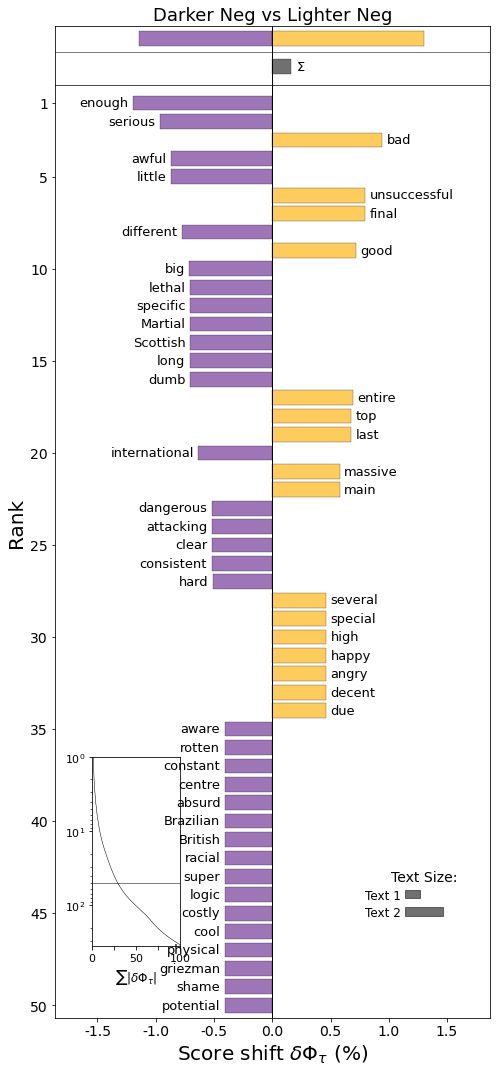

In [74]:
# entropy_shift = rs.EntropyShift(type2freq_1=darker_neg_text, type2freq_2=lighter_neg_text,  base=2)
# entropy_shift.get_shift_graph(filename="shifterator-neg.png",title='Darker Neg vs Lighter Neg')

entropy_shift = rs.EntropyShift(type2freq_1=darker_pos_text, type2freq_2=lighter_pos_text,  base=2)
entropy_shift.get_shift_graph(filename="shifterator-neg.png",title='Darker Pos vs Lighter Neg')


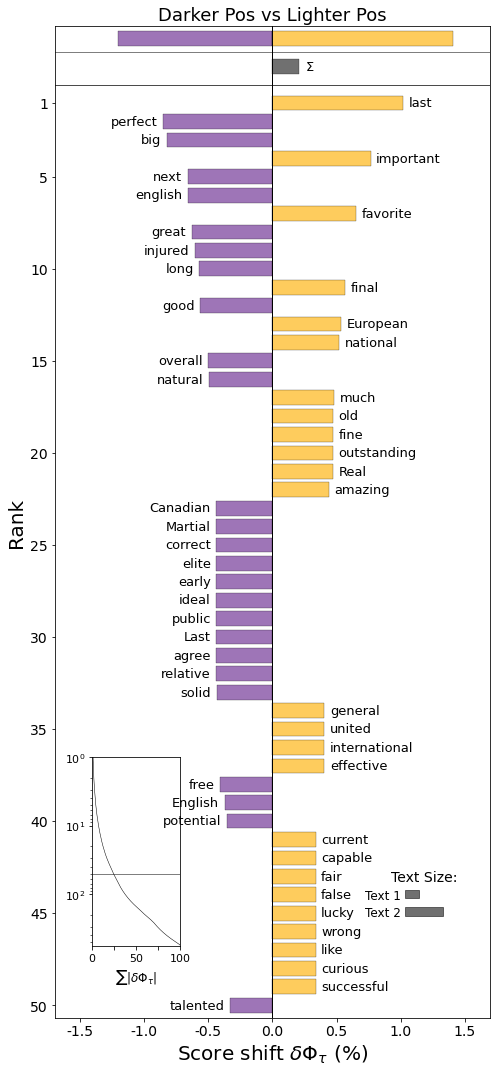

In [75]:
entropy_shift = rs.EntropyShift(type2freq_1=darker_pos_text, type2freq_2=lighter_pos_text,  base=2)
entropy_shift.get_shift_graph(filename="shifterator-pos.png",title='Darker Pos vs Lighter Pos')

In [3]:
plot = rs.JSDivergenceShift(type2freq_1=darker_neg_text, type2freq_2=lighter_neg_text, base=2)
plot.get_shift_graph()

NameError: name 'darker_neg_text' is not defined

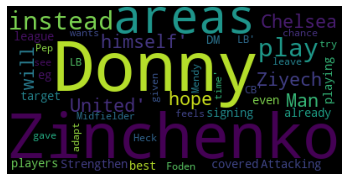

In [57]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
text = lighter_pos["ProComment"].values
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("lighterpos.png")
plt.show()

In [169]:
# decoding of skin color label, 
df["Skin"] = (df["SkinColor"]).apply(
                  lambda x: 1 if (x == "Dark Brown") or (x=="Brown") or (x=="Black") else 0)

In [177]:
# remove Olive group
df = df[~(df["SkinColor"]=="Olive")]
df1 = df.copy()
# remove neutral group for another chi-square test
df1 = df1[~(df1["Emotion"]=="neutral")]
df1

,ID,ComID,Comment,ProComment,PublishDate,NameEnt,Name,Club,SkinColor,Sentiment,Emotion,Skin,Emo
0,25658,glkb038,"**Manchester United's right back dilemmas, who...",His experience and winning mentality may defin...,2021-02-01 05:44:16,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Manchester United,Dark Brown,0.9299,positive,1,-1
3,18166,cedjva3,"No Adnan, Zaha loosing ground. List confirmed ...",List confirmed for Abu bias,2013-12-30 21:09:51,Abu,Abu Danladi,Minnesota United,Black,-0.1027,negative,1,1
4,5457,ey5bfj0,Hey Dreamerofspring \n\n\nThanks so much for...,especially the chances of Abu and Pepe,2019-08-26 15:49:14,Abu,Abu Danladi,Minnesota United,Black,0.2682,positive,1,-1
11,6600,f77dkfy,Agudelo truly makes a difference,Agudelo truly makes a difference,2019-11-11 07:00:44,Agudelo,Juan Sebastián Agudelo,Minnesota United,Brown,0.4404,positive,1,-1
14,22330,g6yr5gm,"4 isn’t too many options, it’s the correct amo...",Also Ake can play left back which is a problem...,2020-09-28 18:18:49,Ake,Ake Arnaud Loba,Nashville SC,Black,-0.0772,negative,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,27413,gwy8bt2,I totally agree. English commentators don't ju...,The English commentators called Verratti child...,2021-05-04 23:24:12,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,-0.3506,negative,0,1
3608,2464,e9fzjp8,They gave Zinchenko a chance only because they...,They gave Zinchenko a chance only because they...,2018-11-10 22:30:53,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.5413,positive,0,-1
3609,5595,eyzdfg3,I could see Pep go 3 at the back to counter. O...,Heck I could see Pep try to adapt Mendy or Zin...,2019-09-04 18:40:13,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.3400,positive,0,-1
3610,21887,g48tdk7,Chelsea should aim to have around 75 -80 point...,"But ofcourse Chelsea can do the unthinkable, I...",2020-09-06 18:29:39,Zouma,Kurt Happy Zouma,West Ham United,Black,0.9542,positive,1,-1


In [178]:
# Get sentiment category: positive, negative and neutral
def emo(x):
    if x == "positive":
        return -1
    elif x == "neutral":
        return 0
    else:
        return 1

df1["Emo"] = (df1["Emotion"]).apply(emo)
df1

,ID,ComID,Comment,ProComment,PublishDate,NameEnt,Name,Club,SkinColor,Sentiment,Emotion,Skin,Emo
0,25658,glkb038,"**Manchester United's right back dilemmas, who...",His experience and winning mentality may defin...,2021-02-01 05:44:16,Aaron Wan-Bissaka,Aaron Wan-Bissaka,Manchester United,Dark Brown,0.9299,positive,1,-1
3,18166,cedjva3,"No Adnan, Zaha loosing ground. List confirmed ...",List confirmed for Abu bias,2013-12-30 21:09:51,Abu,Abu Danladi,Minnesota United,Black,-0.1027,negative,1,1
4,5457,ey5bfj0,Hey Dreamerofspring \n\n\nThanks so much for...,especially the chances of Abu and Pepe,2019-08-26 15:49:14,Abu,Abu Danladi,Minnesota United,Black,0.2682,positive,1,-1
11,6600,f77dkfy,Agudelo truly makes a difference,Agudelo truly makes a difference,2019-11-11 07:00:44,Agudelo,Juan Sebastián Agudelo,Minnesota United,Brown,0.4404,positive,1,-1
14,22330,g6yr5gm,"4 isn’t too many options, it’s the correct amo...",Also Ake can play left back which is a problem...,2020-09-28 18:18:49,Ake,Ake Arnaud Loba,Nashville SC,Black,-0.0772,negative,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,27413,gwy8bt2,I totally agree. English commentators don't ju...,The English commentators called Verratti child...,2021-05-04 23:24:12,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,-0.3506,negative,0,1
3608,2464,e9fzjp8,They gave Zinchenko a chance only because they...,They gave Zinchenko a chance only because they...,2018-11-10 22:30:53,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.5413,positive,0,-1
3609,5595,eyzdfg3,I could see Pep go 3 at the back to counter. O...,Heck I could see Pep try to adapt Mendy or Zin...,2019-09-04 18:40:13,Zinchenko,Oleksandr Volodymyrovych Zinchenko,Manchester City,White,0.3400,positive,0,-1
3610,21887,g48tdk7,Chelsea should aim to have around 75 -80 point...,"But ofcourse Chelsea can do the unthinkable, I...",2020-09-06 18:29:39,Zouma,Kurt Happy Zouma,West Ham United,Black,0.9542,positive,1,-1


In [172]:
def chi2_by_hand(df, col1, col2):    
    # Create the contingency table
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    # Calculate degree of freedom
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    # Sum up the totals for row and columns
    df_cont.loc[:,'Total'] = df_cont.sum(axis=1)
    df_cont.loc['Total'] = df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    # Create the expected value dataframe
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values,df_cont.sum().values) 
    df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # Calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    # Get chi-square score   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    return chi_square_score, degree_f

In [173]:
# with neutral
chi_score, degree_f = chi2_by_hand(df,'Skin','Emo')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}')

Emo,-1,0,1
Skin,,,
0,1101,684,427
1,375,256,187


---Observed (O)---


Emo,-1,0,1,Total
Skin,,,,
0,1101,684,427,2212
1,375,256,187,818
Total,1476,940,614,3030


---Expected (E)---


Emo,-1,0,1,Total
Skin,,,,
0,13059648,8317120,5432672,26809440
1,4829472,3075680,2009008,9914160
Total,17889120,11392800,7441680,36723600


---Chi-Square---


Emo,-1,0,1,Total
Skin,,,,
0,1.305745e+07,8.315752e+06,5.431818e+06,5.361003e+07
1,4.828722e+06,3.075168e+06,2.008634e+06,1.982505e+07
Total,3.577234e+07,2.278184e+07,1.488090e+07,1.468702e+08


Chi2_score: 36717540.25046608, Degrees of freedom: 2


In [174]:
# Calculate the p-value (with neutral)
from scipy import stats
p = stats.distributions.chi2.sf(chi_score, degree_f)
p

0.0

p < 0.05 — this means the two categorical variables are correlated.

In [179]:
# without neutral
chi_score1, degree_f1 = chi2_by_hand(df1, "Skin", "Emo")
print(f'Chi2_score: {chi_score1}, Degrees of freedom: {degree_f1}')

Emo,-1,1
Skin,,
0,1101,427
1,375,187


---Observed (O)---


Emo,-1,1,Total
Skin,,,
0,1101,427,1528
1,375,187,562
Total,1476,614,2090


---Expected (E)---


Emo,-1,1,Total
Skin,,,
0,9021312,3752768,12774080
1,3318048,1380272,4698320
Total,12339360,5133040,17472400


---Chi-Square---


Emo,-1,1,Total
Skin,,,
0,9.019110e+06,3.751914e+06,2.554205e+07
1,3.317298e+06,1.379898e+06,9.394392e+06
Total,2.467282e+07,1.026362e+07,6.987288e+07


Chi2_score: 17468220.25067272, Degrees of freedom: 1


In [180]:
from scipy import stats
p = stats.distributions.chi2.sf(chi_score1, degree_f1)
p

0.0